# Plotting

This notebook will describe how to visualize data using GrandPy in different scenarios. In addition to QC plots (see the [differential expression](../notebook_01_differential_expression.ipynb) and [kinetic modeling](../notebook_02_kinetic_modeling.ipynb) notebooks) and vulcano/MA plots (see the [differential expression](../notebook_01_differential_expression.ipynb) notebook), the plotting functions in GrandPy consist of:

- Gene-wise visualizations
- Global visualizations (scatter plots, heatmaps)

# Gene-wise visualization

All functions that visualize data for a single gene start with `plot_gene_...`. We demonstrate the first few using the [BANP data set](https://www.nature.com/articles/s41586-021-03689-8). These are SLAM-seq data from multiple time points (1h, 2h, 4h, 6h and 20h) after acute depletion of BANP. We first load and preprocess this data as usual:

In [3]:
import warnings
import pandas as pd
from scripts.regsetup import description

import grandpy as gp
from grandpy import ModeSlot

warnings.filterwarnings("ignore", category=UserWarning)

banp = gp.read_grand("https://zenodo.org/record/6976391/files/BANP.tsv.gz", design=("Cell", "Experimental.time", "Genotype", "duration.4sU", "has.4sU", "Replicate"))

Detected URL -> downloading to temp file
Detected dense format -> using dense reader
Temporary file BANP.tsv.gz was deleted after loading.


In [4]:
banp = banp.filter_genes()
banp = banp.normalize()

Refer to the [loading data](../notebook_03_loading_data_and_working_with_grandpy_objects.ipynb) notebook to learn more about how to load data.

The most basic plots are just showing the raw data (from the defualt slot, by default shown in log scale, both can be changed via parameters):

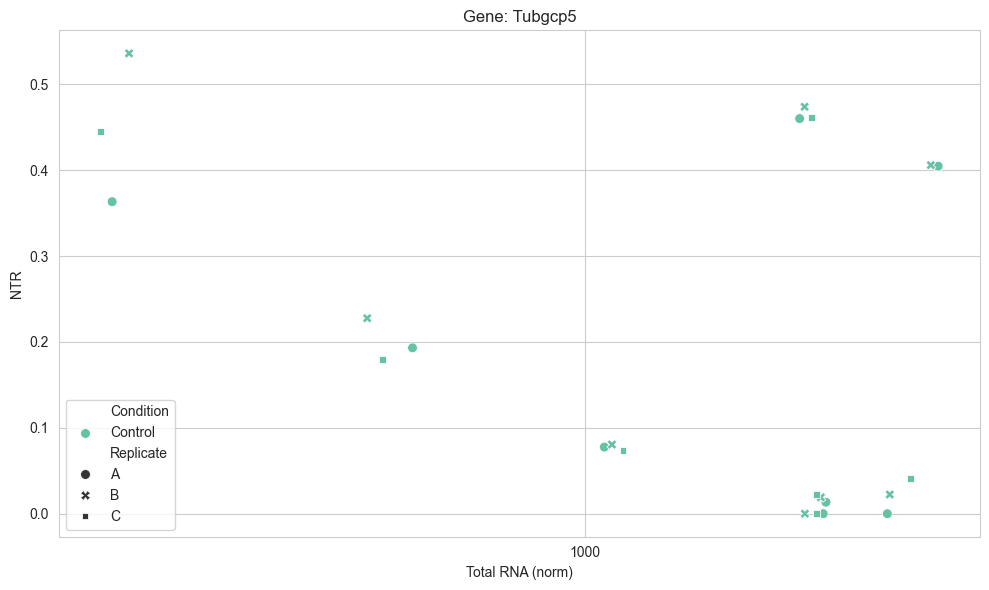

In [5]:
gp.plot_gene_total_vs_ntr(banp, gene = "Tubgcp5")

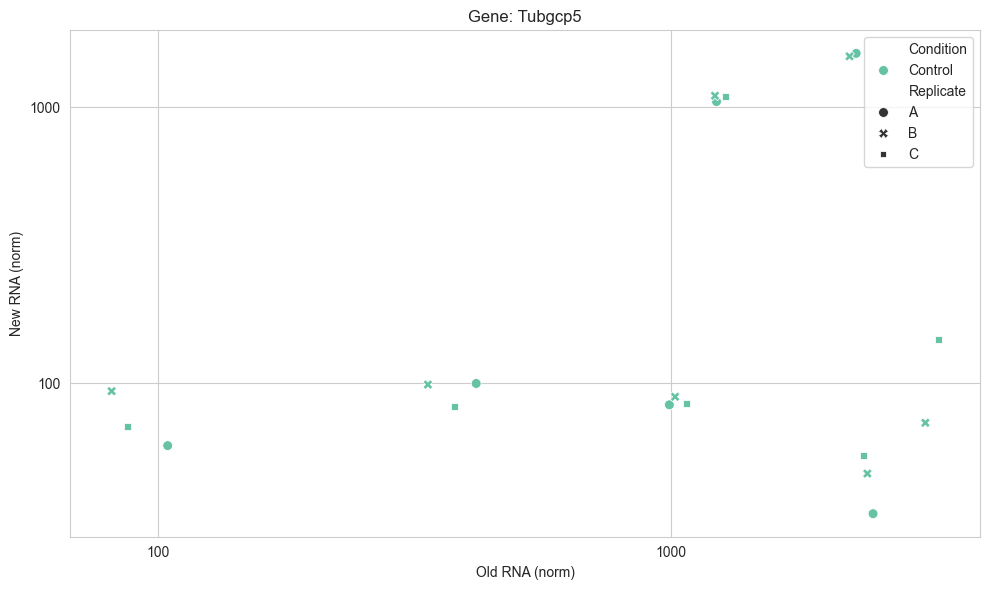

In [6]:
gp.plot_gene_old_vs_new(banp,gene = "Tubgcp5")

By defualt replicates (if present in the `Coldata` table) will be shown as the point shapes, and conditions as colors. Here we do not have a Condition, so let's add this (and show only the new vs. old plot, as this works the same way for the total vs. NTR):

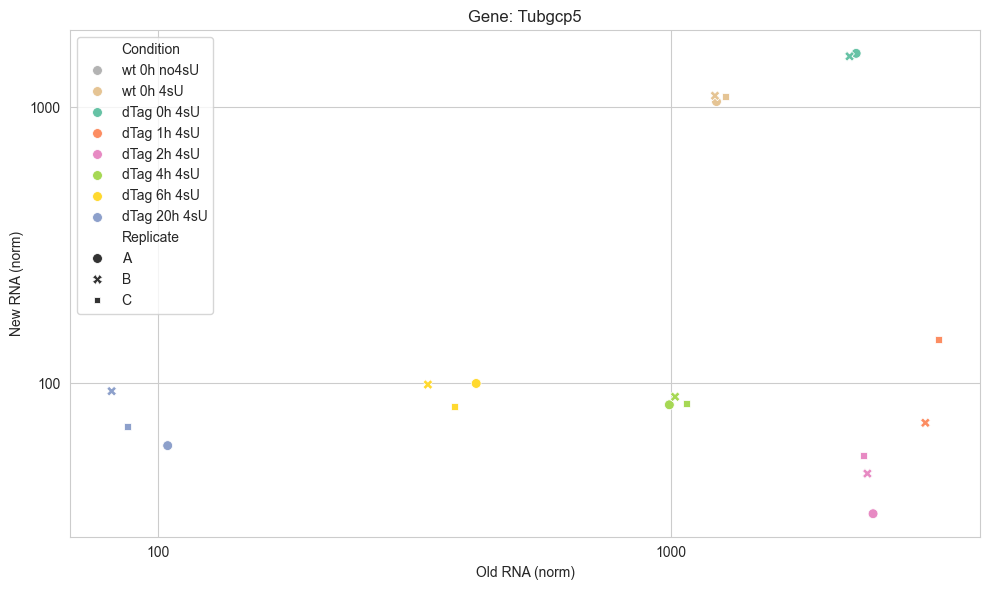

In [8]:
banp = banp.with_condition(value = ["Genotype", "Experimental.time.original", "has.4sU"])
gp.plot_gene_old_vs_new(banp, gene = "Tubgcp5")

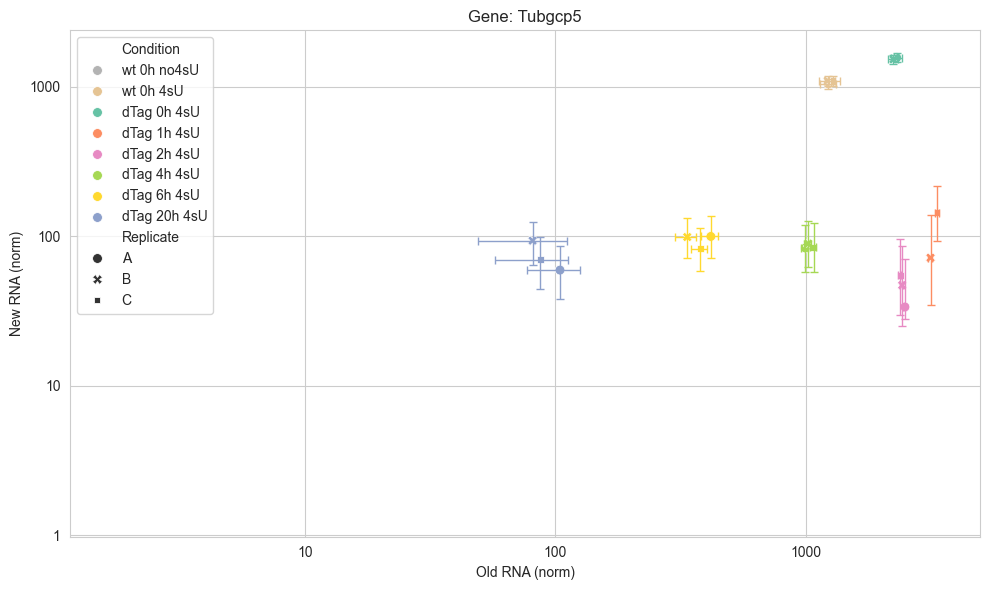